In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [2]:
# 사용할 선 스타일을 정의합니다.
linestyles = ['-', '--', ':', '-.']

# 기대값(E) 함수를 정의합니다.
# XY는 확률변수의 집합과 그에 대한 결합확률함수를 나타냅니다.
# g는 확률변수에 적용할 함수입니다.
def E(XY, g):
    # XY로부터 확률변수의 집합과 결합확률함수를 추출합니다.
    x_set, y_set, f_XY = XY
    # 이중 합을 이용하여 기대값을 계산합니다.
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                 for x_i in x_set for y_j in y_set])

# 공분산(Cov) 함수를 정의합니다.
# XY는 확률변수의 집합과 그에 대한 결합확률함수를 나타냅니다.
def Cov(XY):
    # XY로부터 확률변수의 집합과 결합확률함수를 추출합니다.
    x_set, y_set, f_XY = XY
    # X와 Y의 기대값을 계산합니다.
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    # 이중 합을 이용하여 공분산을 계산합니다.
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

# X의 주변 확률밀도함수(f_X)를 계산하는 함수를 정의합니다.
def f_X(x):
    # y_set을 이용하여 주변 확률밀도함수를 계산합니다.
    return np.sum([f_XY(x, y_k) for y_k in y_set])

# Y의 주변 확률밀도함수(f_Y)를 계산하는 함수를 정의합니다.
def f_Y(y):
    # x_set을 이용하여 주변 확률밀도함수를 계산합니다.
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [3]:
# x의 가능한 값들을 numpy 배열로 설정합니다.
x_set = np.array([1, 2, 3, 4, 5, 6])
# y의 가능한 값들을 numpy 배열로 설정합니다.
y_set = np.array([1, 2, 3, 4, 5, 6])

# 결합확률함수 f_XY를 정의합니다.
# 이 함수는 x와 y가 각각 x_set과 y_set에 포함된 값일 경우에만 확률값을 반환합니다.
def f_XY(x, y):
    # x와 y가 정의된 집합 안에 있을 때,
    if x in x_set and y in y_set:
        # x와 y의 곱을 441로 나누어 반환합니다.
        return x * y / 441
    else:
        # x와 y 중 하나라도 집합에 포함되지 않는 경우, 확률은 0입니다.
        return 0

# XY는 x_set, y_set, f_XY의 리스트입니다. 
# 이 리스트는 다른 함수들에서 확률변수의 집합과 결합확률함수로 사용됩니다.
XY = [x_set, y_set, f_XY]

In [4]:
# XY의 두 확률변수에 대한 공분산을 계산합니다.
# 이 함수는 이전에 정의된 결합확률함수 f_XY를 사용하여
# X와 Y의 기대값과 이들의 곱의 기대값을 바탕으로 공분산을 계산합니다.
Cov(XY)

-0.000

In [5]:
# X의 가능한 값들을 numpy 배열로 설정합니다.
x_set = np.array([0, 1])
# Y의 가능한 값들을 numpy 배열로 설정합니다.
y_set = np.array([-1, 0, 1])

# 결합확률함수 f_XY를 정의합니다.
# x와 y의 특정 쌍에 대해서만 확률을 할당합니다.
def f_XY(x, y):
    # (x, y)가 (0, 0), (1, 1), (1, -1) 중 하나인 경우 확률을 1/3로 반환합니다.
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:
        return 1 / 3
    else:
        # 그 외의 경우에는 확률을 0으로 반환합니다.
        return 0

# XY는 x_set, y_set, 그리고 f_XY 함수를 포함하는 리스트입니다.
# 이 리스트는 확률변수 X, Y의 결합확률분포를 나타냅니다.
XY = [x_set, y_set, f_XY]

In [6]:
# 공분산을 계산합니다.
# 결과값이 0이라는 것은 X와 Y사이에 선형적인 관계가 없음을 의미합니다.
Cov(XY)

0.000

In [7]:
# X=0일 때의 X의 주변 확률밀도함수를 계산합니다.
# 이는 Y의 모든 가능한 값에 대해 X=0일 때의 결합확률밀도함수 f_XY를 합산하여 얻습니다.

# Y=0일 때의 Y의 주변 확률밀도함수를 계산합니다.
# 이는 X의 모든 가능한 값에 대해 Y=0일 때의 결합확률밀도함수 f_XY를 합산하여 얻습니다.

# (X=0, Y=0)일 때의 결합확률밀도함수 값을 계산합니다.
# 이는 주어진 (0, 0)에서의 확률을 직접 반환합니다.
f_X(0) * f_Y(0), f_XY(0, 0)

(0.111, 0.333)

In [8]:
# stats.norm을 사용하여 평균이 1이고 분산이 2인 정규분포 확률변수 rv1을 생성합니다.
rv1 = stats.norm(1, np.sqrt(2))
# stats.norm을 사용하여 평균이 2이고 분산이 3인 정규분포 확률변수 rv2를 생성합니다.
rv2 = stats.norm(2, np.sqrt(3))

# 샘플 크기를 1백만으로 설정합니다.
sample_size = int(1e6)
# rv1에서 1백만 개의 샘플을 생성합니다.
X_sample = rv1.rvs(sample_size)
# rv2에서 1백만 개의 샘플을 생성합니다.
Y_sample = rv2.rvs(sample_size)
# 두 샘플의 합을 계산합니다.
sum_sample = X_sample + Y_sample

# sum_sample의 평균과 분산을 계산합니다.
np.mean(sum_sample), np.var(sum_sample)

(3.003, 4.996)

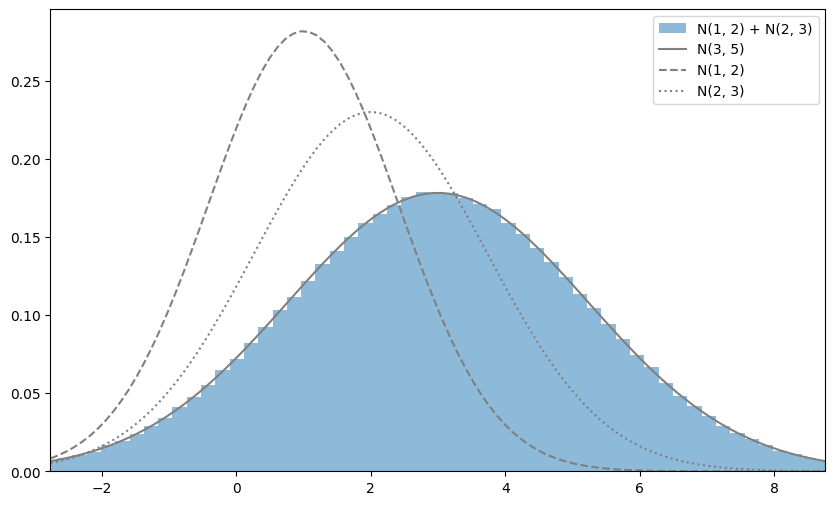

In [9]:
# matplotlib.pyplot 라이브러리를 이용하여 그림의 크기를 10x6 인치로 설정합니다.
fig = plt.figure(figsize=(10, 6))
# 서브플롯을 추가합니다.
ax = fig.add_subplot(111)

# 평균이 3이고 분산이 5인 정규분포 확률변수를 생성합니다.
rv = stats.norm(3, np.sqrt(5))
# 확률밀도함수를 그릴 x값의 범위를 설정합니다. 
# 여기서는 확률변수의 상위 0.5% 값에서 하위 0.5% 값까지의 범위를 100개의 점으로 나누어 xs에 저장합니다.
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

# sum_sample의 히스토그램을 그립니다. 
# bins=100은 히스토그램의 막대 수를 100개로 설정합니다.
# density=True는 확률밀도함수로서의 히스토그램을 그리기 위함입니다.
# alpha=0.5는 히스토그램의 투명도를 설정합니다.
# label은 범례에 사용될 텍스트를 설정합니다.
ax.hist(sum_sample, bins=100, density=True, alpha=0.5, label='N(1, 2) + N(2, 3)')

# 평균이 3이고 분산이 5인 정규분포의 확률밀도함수를 그립니다. 색상은 회색으로 설정합니다.
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')

# 평균이 1이고 분산이 2인 정규분포의 확률밀도함수를 점선으로 그립니다. 색상은 회색으로 설정합니다.
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')

# 평균이 2이고 분산이 3인 정규분포의 확률밀도함수를 점선으로 그립니다. 색상은 회색으로 설정합니다.
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray')

# 범례를 표시합니다.
ax.legend()

# x축의 범위를 설정합니다. 이는 확률밀도함수를 그릴 때 사용한 xs와 동일한 범위를 사용합니다.
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))

# 그림을 표시합니다.
plt.show()

In [10]:
# 평균이 3인 포아송 분포 확률변수 rv1을 생성합니다.
rv1 = stats.poisson(3)
# 평균이 4인 포아송 분포 확률변수 rv2를 생성합니다.
rv2 = stats.poisson(4)

# 샘플의 크기를 1백만으로 설정합니다.
sample_size = int(1e6)
# rv1에서 1백만 개의 샘플을 생성합니다.
X_sample = rv1.rvs(sample_size)
# rv2에서 1백만 개의 샘플을 생성합니다.
Y_sample = rv2.rvs(sample_size)
# 두 샘플의 합을 계산합니다.
sum_sample = X_sample + Y_sample

# sum_sample의 평균과 분산을 계산합니다.
np.mean(sum_sample), np.var(sum_sample)

(6.999, 6.990)

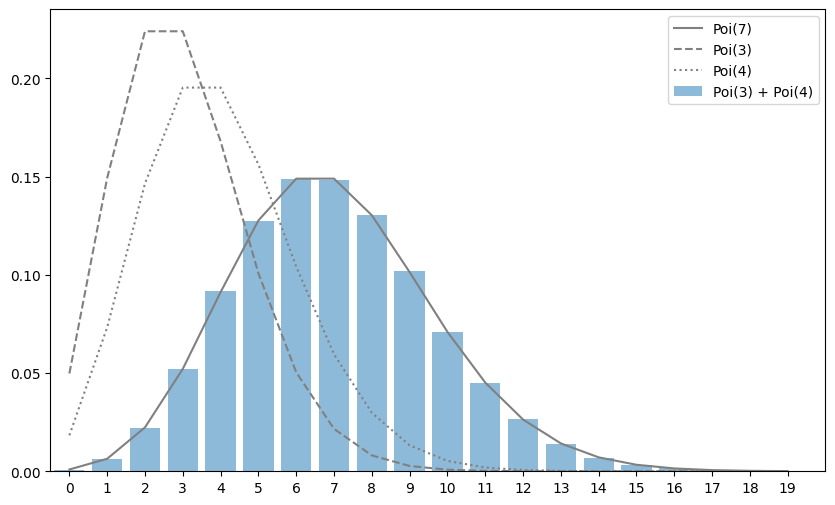

In [11]:
# matplotlib 라이브러리를 사용하여 그래프의 크기를 가로 10인치, 세로 6인치로 설정합니다.
fig = plt.figure(figsize=(10, 6))
# 1x1 그리드에 첫 번째 subplot을 추가합니다.
ax = fig.add_subplot(111)

# 평균이 7인 포아송 분포 객체를 생성합니다.
rv = stats.poisson(7)
# 0부터 19까지의 정수 배열을 생성합니다.
xs = np.arange(20)
# sum_sample의 히스토그램을 계산하며, 구간은 0부터 20까지, 막대의 수는 20개입니다.
# density=True로 설정하여 확률 히스토그램을 생성합니다.
hist, _ = np.histogram(sum_sample, bins=20, range=(0, 20), density=True)

# xs 위치에 높이가 hist인 막대를 그립니다. alpha는 막대의 투명도를 설정합니다.
ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
# xs 위치에서 평균이 7인 포아송 분포의 PMF를 그립니다. 색상은 회색입니다.
ax.plot(xs, rv.pmf(xs), label='Poi(7)', color='gray')
# xs 위치에서 평균이 3인 포아송 분포의 PMF를 점선으로 그립니다. 색상은 회색입니다.
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
# xs 위치에서 평균이 4인 포아송 분포의 PMF를 점선으로 그립니다. 색상은 회색입니다.
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':', color='gray')

# 범례를 추가합니다.
ax.legend()
# x축의 범위를 설정합니다.
ax.set_xlim(-0.5, 20)
# x축에 눈금을 설정합니다.
ax.set_xticks(np.arange(20))
# 그래프를 표시합니다.
plt.show()

In [12]:
# 성공 확률이 0.3인 베르누이 분포를 정의합니다.
p = 0.3
rv = stats.bernoulli(p)

# 샘플의 크기를 1백만으로 설정합니다.
sample_size = int(1e6)

# 베르누이 분포에서 10회의 시행을 1백만 번 반복하여 샘플을 생성합니다.
# 여기서 Xs_sample의 각 행은 한 번의 베르누이 시행 결과를 나타내고, 열은 각 시행의 반복을 나타냅니다.
Xs_sample = rv.rvs((10, sample_size))

# 10번의 시행에 대한 결과의 합을 계산합니다.
# axis=0은 열을 따라 합산하라는 의미입니다. 즉, 각 열의 모든 행 값을 합산합니다.
sum_sample = np.sum(Xs_sample, axis=0)

# sum_sample의 평균과 분산을 계산합니다.
np.mean(sum_sample), np.var(sum_sample)

(2.999, 2.095)

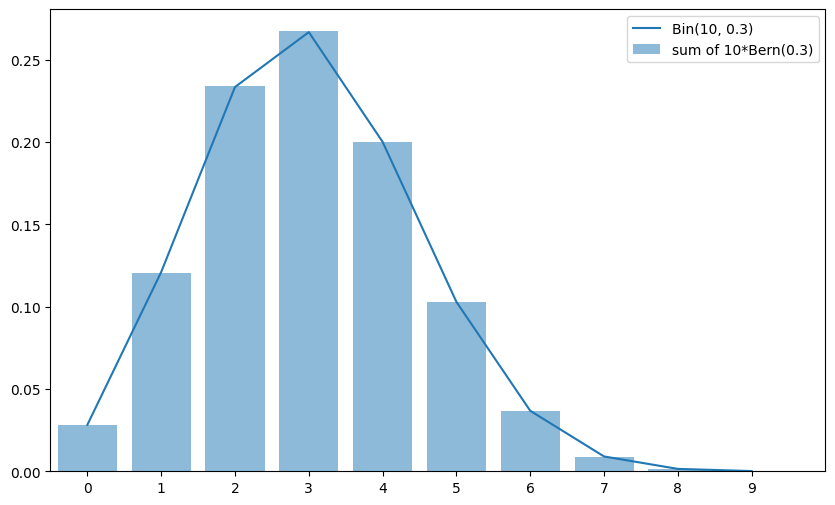

In [13]:
# 10x6 인치 크기의 새로운 그림을 생성합니다.
fig = plt.figure(figsize=(10, 6))
# 1x1 그리드의 첫 번째 서브플롯을 추가합니다.
ax = fig.add_subplot(111)

# 10번 시행하고 성공 확률이 0.3인 이항 분포 객체를 생성합니다.
rv = stats.binom(10, p)
# 0부터 9까지의 정수 배열을 생성합니다.
xs = np.arange(10)
# sum_sample의 히스토그램을 계산합니다. bins=10은 10개의 구간으로 나누며,
# range=(0, 10)은 히스토그램의 범위를 0부터 10까지로 설정합니다.
# density=True는 결과를 확률로 나타내기 위해 정규화합니다.
hist, _ = np.histogram(sum_sample, bins=10, range=(0, 10), density=True)
# xs 위치에 높이가 hist인 막대를 그립니다. alpha는 투명도를 나타냅니다.
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
# xs 위치에서 이항 분포의 PMF를 그립니다.
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')
# 범례를 표시합니다.
ax.legend()
# x축의 범위를 설정합니다.
ax.set_xlim(-0.5, 10)
# x축에 눈금을 설정합니다.
ax.set_xticks(np.arange(10))
# 그림을 표시합니다.
plt.show()

In [14]:
# 평균이 1이고 분산이 2인 정규분포 객체를 생성합니다.
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

# 10개의 샘플을 추출할 것이며, 샘플링은 1백만 번 수행됩니다.
n = 10
sample_size = int(1e6)

# 정규분포에서 n개의 샘플을 sample_size번 만큼 추출합니다.
# 이때 Xs_sample은 각 행이 독립적인 샘플을 나타내고, 열은 샘플링 반복을 나타냅니다.
Xs_sample = rv.rvs((n, sample_size))

# 각 샘플링에 대한 평균을 계산합니다.
# axis=0은 각 열의 샘플들에 대해 평균을 구하라는 의미입니다.
sample_mean = np.mean(Xs_sample, axis=0)

# sample_mean의 평균과 분산을 계산합니다.
np.mean(sample_mean), np.var(sample_mean)

(1.000, 0.199)

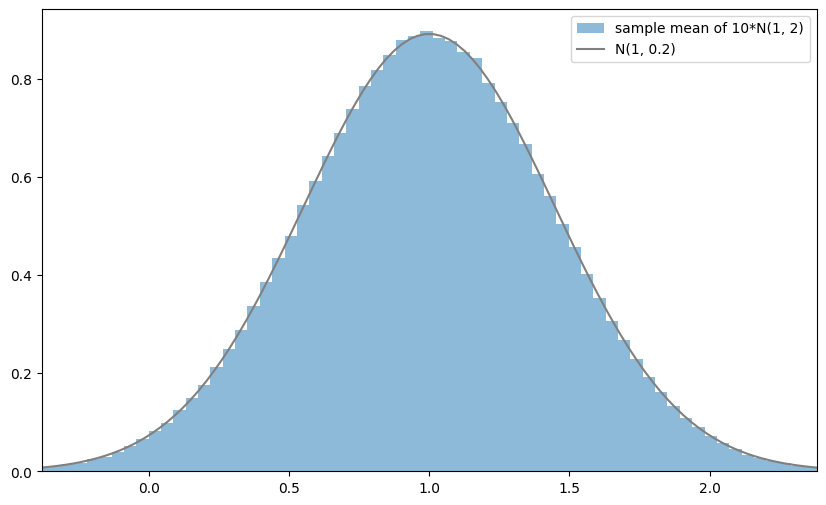

In [15]:
# 10x6 인치 크기로 새로운 그래프를 생성합니다.
fig = plt.figure(figsize=(10, 6))
# 1x1 그리드의 첫 번째 서브플롯을 추가합니다.
ax = fig.add_subplot(111)

# 중심극한정리에 따라 예측된 정규분포를 정의합니다.
# 이 분포는 원래 분포의 평균인 1과 샘플 크기 10으로 나눈 분산의 제곱근인 np.sqrt(var/n)을 갖습니다.
rv_true = stats.norm(mean, np.sqrt(var/n))

# 상위 0.1%에서 하위 0.1%에 해당하는 값들로 구성된 100개의 데이터 포인트를 생성합니다.
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

# sample_mean의 히스토그램을 그립니다. bins=100은 막대의 수를 100개로 설정합니다.
# density=True는 히스토그램을 확률 밀도로 나타냅니다. alpha는 투명도를 설정합니다.
ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='sample mean of 10*N(1, 2)')

# 예측된 정규분포의 확률 밀도 함수를 그립니다.
ax.plot(xs, rv_true.pdf(xs), label='N(1, 0.2)', color='gray')

# 범례를 추가합니다.
ax.legend()
# x축의 범위를 설정합니다.
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
# 그래프를 화면에 표시합니다.
plt.show()

In [16]:
# 람다가 3인 포아송 분포 객체를 생성합니다.
l = 3
rv = stats.poisson(l)

# 샘플의 개수를 10으로, 샘플링을 수행할 횟수를 1백만으로 설정합니다.
n = 10
sample_size = int(1e6)

# 포아송 분포에서 n개의 샘플을 sample_size번 만큼 추출합니다.
# Xs_sample의 각 행은 독립적인 샘플을 나타내고, 열은 샘플링 반복을 나타냅니다.
Xs_sample = rv.rvs((n, sample_size))

# 각 반복별 샘플들의 평균값을 계산합니다.
sample_mean = np.mean(Xs_sample, axis=0)

# 샘플 평균의 평균과 분산을 계산합니다.
np.mean(sample_mean), np.var(sample_mean)

(2.999, 0.300)

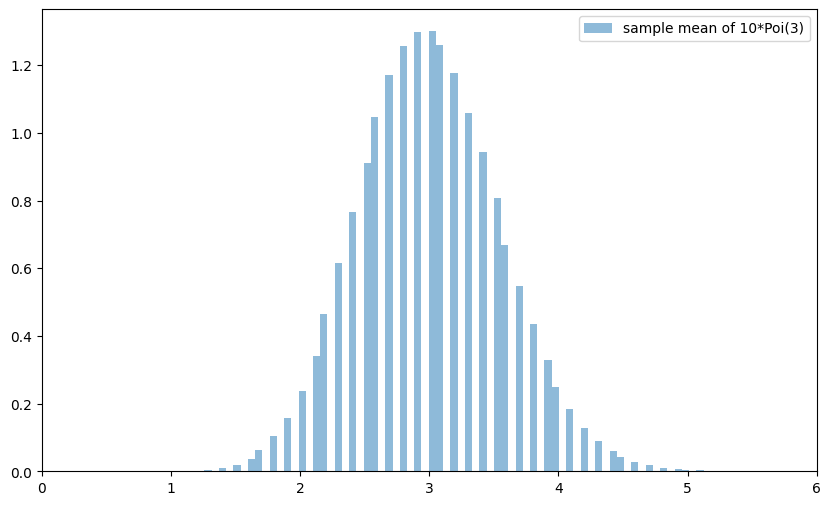

In [17]:
# 10x6 인치의 크기로 새로운 그래프 창을 생성합니다.
fig = plt.figure(figsize=(10, 6))
# 1x1 그리드에 첫 번째 subplot을 추가합니다.
ax = fig.add_subplot(111)

# sample_mean의 히스토그램을 그립니다. bins=100은 막대의 개수를 100으로 설정합니다.
# density=True는 히스토그램을 확률 밀도 함수로 나타내기 위해 정규화합니다.
# alpha는 막대의 투명도를 0.5로 설정하여 겹침을 볼 때 유용하게 합니다.
# label은 범례에 표시될 문자열을 설정합니다.
ax.hist(sample_mean
        , bins=100
        , density=True
        , alpha=0.5
        , label='sample mean of 10*Poi(3)')

# 범례를 그래프에 추가합니다.
ax.legend()
# x축의 범위를 0부터 6까지로 설정합니다.
ax.set_xlim(0, 6)
# 그래프를 화면에 표시합니다.
plt.show()

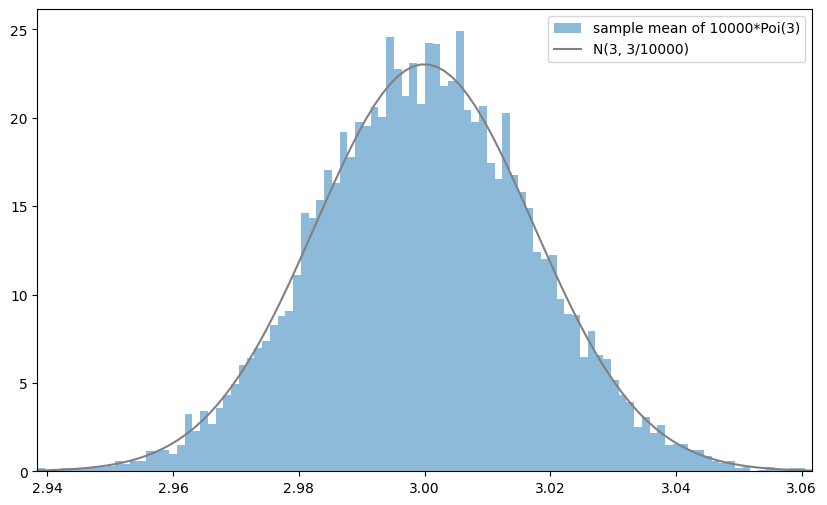

In [18]:
# 람다가 3인 포아송 분포 객체를 생성합니다.
l = 3
rv = stats.poisson(l)

# 각각 10000개의 샘플을 포함하는 10000개의 샘플 집합을 생성합니다.
n = 10000
sample_size = 10000
# 포아송 분포에서 n개의 샘플을 sample_size번 만큼 추출합니다.
Xs_sample = rv.rvs((n, sample_size))
# 각 샘플 집합에 대한 평균값을 계산합니다.
sample_mean = np.mean(Xs_sample, axis=0)

# 중심극한정리에 의해 예측되는 정규분포 객체를 생성합니다.
# 이 분포는 포아송 분포의 평균 l과 샘플 크기 n으로부터 계산된 분산을 가집니다.
rv_true = stats.norm(l, np.sqrt(l/n))
# 샘플 평균의 최소값과 최대값을 구합니다.
min_x, max_x = sample_mean.min(), sample_mean.max()
# 최소값과 최대값 사이에 100개의 동일한 간격을 가진 점들을 생성합니다.
xs = np.linspace(min_x, max_x, 100)

# 10x6 인치 크기의 그래프를 생성합니다.
fig = plt.figure(figsize=(10, 6))
# 그래프의 축을 설정합니다.
ax = fig.add_subplot(111)

# 샘플 평균의 히스토그램을 그립니다. bins=100은 막대의 개수를 설정합니다.
# density=True로 설정하여 히스토그램을 확률 밀도로 나타냅니다.
ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='sample mean of 10000*Poi(3)')
# x축의 범위를 샘플 평균의 최소값과 최대값으로 설정합니다.
ax.set_xlim(min_x, max_x)

# 예측된 정규분포의 PDF를 그립니다.
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

# 범례를 추가합니다.
ax.legend()
# 그래프를 화면에 표시합니다.
plt.show()

In [19]:
# 성공 확률이 1/6인 베르누이 분포 객체를 생성합니다.
p = 1/6
rv = stats.bernoulli(p)

# 총 10만 번의 시행을 할 것입니다.
n = int(1e5)

# 베르누이 분포에서 n번 시행을 4번 반복하여 샘플을 생성합니다.
# 여기서 sample은 각 행이 독립적인 시행을 나타내고, 열은 반복을 나타냅니다.
sample = rv.rvs((n, 4))

# 100부터 n까지 50개의 구간으로 나누어 각 시행 구간을 생성합니다.
space = np.linspace(100, n, 50).astype(int)

# space의 각 값에 대해 해당 시점까지의 샘플의 평균을 계산합니다.
# 결과는 각 반복에 대한 평균값의 배열로, 열별로 평균을 계산합니다.
plot_list = np.array([np.mean(sample[:sp], axis=0)
                     for sp in space]).T

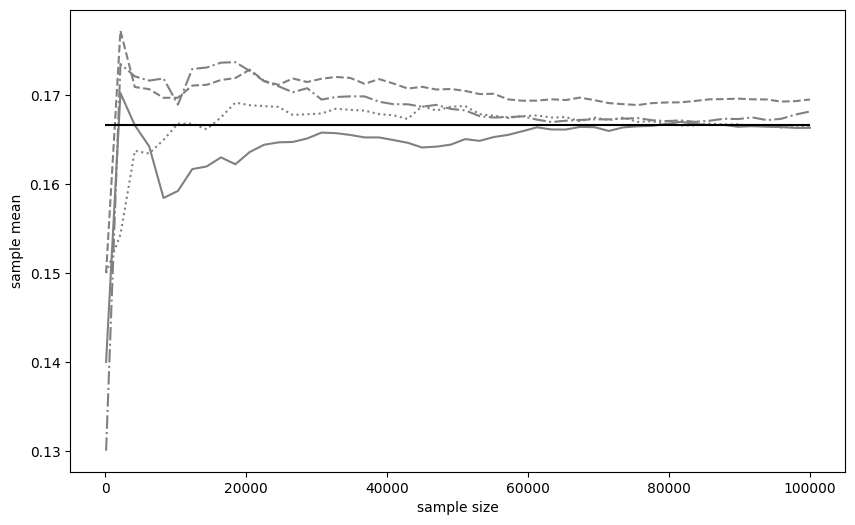

In [20]:
# 10x6 인치의 그래프 창을 생성합니다.
fig = plt.figure(figsize=(10, 6))
# 그래프의 축을 추가합니다.
ax = fig.add_subplot(111)

# plot_list에 있는 각 샘플 평균 시퀀스에 대해 그래프를 그립니다.
# linestyles는 그래프의 선 스타일을 지정합니다.
for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')

# 수평선을 그려 성공 확률 p를 나타냅니다.
ax.hlines(p, -1, n, 'k')
# x축의 레이블을 'sample size'로 설정합니다.
ax.set_xlabel('sample size')
# y축의 레이블을 'sample mean'으로 설정합니다.
ax.set_ylabel('sample mean')

# 그래프를 화면에 표시합니다.
plt.show()